In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch 
import torch.nn as nn
import torchvision
import cv2
import os

In [2]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1=nn.Conv3d(1,out_channels=32,kernel_size=3,padding=1,stride=1)
    self.maxpool1=nn.MaxPool3d(kernel_size=2,stride=2)
    self.conv2=nn.Conv3d(32,64,kernel_size=3,padding=1,stride=1)
    self.maxpool2=nn.MaxPool3d(kernel_size=2,stride=2)
    self.linear1=nn.Linear(64*56*56*3,32)
    self.linear2=nn.Linear(32,4)
    self.relu=nn.ReLU(inplace=True)
  def forward(self,x):
    out=self.conv1(x)
    out=self.relu(out)
    #print(out.shape)
    out=self.maxpool1(out)
    #print(out.shape)
    out=self.conv2(out)
    #print(out.shape)
    out=self.relu(out)
    out=self.maxpool2(out)
    
    #print(out.shape)
    out=out.view(-1,64*56*56*3)
    #print(out.shape)
    out=self.linear1(out)
    #print(out.shape)
    out=self.relu(out)
    
    out=self.linear2(out)
    #out=torch.squeeze(out)
    
    
    return out

In [3]:
model=Net()


In [ ]:
img=torch.randn(1,1,12,224,224)

In [ ]:
pred=model(img)
pred.shape

In [ ]:
pred

In [ ]:
real=torch.Tensor([3])
real=real.to(torch.uint8)

In [ ]:
real

In [ ]:
loss=criterion(real,pred)

In [4]:
mask_dir='../input/bounding-boxes/Bounding Boxes/'
images_dir='../input/sun-polyps/Polyps/'

In [5]:
#Appending the various cases
cases=(os.listdir(mask_dir))
cases=[os.path.join(mask_dir,case+'/') for case in cases]
cases=sorted(cases)
def func(x):
    y=x.split('/')[4]
    
cases[:5]

['../input/bounding-boxes/Bounding Boxes/case1/',
 '../input/bounding-boxes/Bounding Boxes/case10/',
 '../input/bounding-boxes/Bounding Boxes/case11/',
 '../input/bounding-boxes/Bounding Boxes/case12/',
 '../input/bounding-boxes/Bounding Boxes/case13/']

Creating four separate lists for storing the cases associated with the respective four classes:
# 0:4mm, 5:9mm, 10:14mm,15:18mm

In [6]:
four_groups_data=pd.read_csv('../input/four-groups-polyps/4_Groups_Polyps.csv')
#less_5 into a list
less_4=[]
less_9=[]
less_14=[]
less_18=[]

less_4_data=four_groups_data[four_groups_data.columns[0]]
less_4_data=less_4_data.dropna(axis=0)
for idx in range(less_4_data.shape[0]):
    less_4.append(four_groups_data[four_groups_data.columns[0]][idx])

less_9_data=four_groups_data[four_groups_data.columns[1]]
less_9_data=less_9_data.dropna(axis=0)
for idx in range(less_9_data.shape[0]):
    less_9.append(four_groups_data[four_groups_data.columns[1]][idx])
    
less_14_data=four_groups_data[four_groups_data.columns[2]]
less_14_data=less_14_data.dropna(axis=0)
for idx in range(less_14_data.shape[0]):
    less_14.append(four_groups_data[four_groups_data.columns[2]][idx])

less_18_data=four_groups_data[four_groups_data.columns[3]]
less_18_data=less_18_data.dropna(axis=0)
for idx in range(less_18_data.shape[0]):
    less_18.append(four_groups_data[four_groups_data.columns[3]][idx])


In [7]:
less_14_data.shape[0]

10

In [ ]:
less_9_data.shape[0]

In [ ]:
less_4_data.shape[0]

In [ ]:
less_18_data.shape[0]

In [8]:
columns=['case','image1','image2','image3','image4','image5','image6','image7','image8','image9','image10','image11','image12','label']
polyp_data=pd.DataFrame(columns=columns)
for idx in range(len(cases)):
    case=cases[idx]
    image_path=os.listdir(case)
    image_path_new=[os.path.join(case,item)for item in image_path]
    image_path.sort()
    case_new=case.split('/')[4]
    #print(case_new)
    if case_new in less_4:
        label=0
    elif case_new in less_9:
        #print('9')
        label=1
    elif case_new in less_14:
        #print('14')
        label=2
    else:
        label=3
    num_images=0
    temp=len(image_path)%12
    temp=len(image_path)-temp
    for index in range(int(temp/12)):
        #print(len(image_path))
        #if(num_images==len(image_path)):
           # break
        temp_images=image_path[num_images:num_images+12]
        temp_images=[os.path.join(case,item) for item in temp_images]
        
        #temp_images=temp_images.sort()
        def func(x):
           
            x=x.split('.')[2]
            
            x=x[-4]+x[-3]+x[-2]+x[-1]
            x=int(x)
            print(x)
            return x
           
        temp_images.sort()
        try:
            temp_data=pd.DataFrame({
        
            'case':[case],
            'image1':[temp_images[0]],
            'image2':[temp_images[1]],
            'image3':[temp_images[2]],
            'image4':[temp_images[3]],
            'image5':[temp_images[4]],
            'image6':[temp_images[5]],
            'image7':[temp_images[6]],
            'image8':[temp_images[7]],
            'image9':[temp_images[8]],
            'image10':[temp_images[9]],
            'image11':[temp_images[10]],
            'image12':[temp_images[11]],
            'label':[label]
        })
        except:
            break
        num_images+=12
        polyp_data=pd.concat([polyp_data,temp_data],ignore_index='True')
        
   

In [ ]:
polyp_data.iloc[polyp_data.shape[0]-1]

In [ ]:
for i in range(12):
    print(polyp_data[polyp_data.columns[i]][polyp_data.shape[0]-1])

In [9]:
polyp_data['label'].unique()

array([3, 0, 1, 2], dtype=object)

# For detecting class imbalance

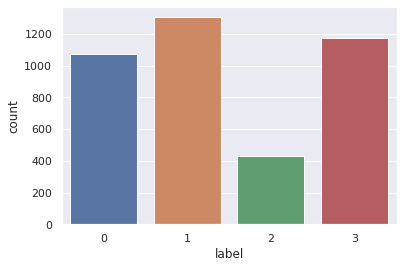

In [10]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax=sns.countplot(x="label",data=polyp_data)

As we can see, class 1, i.e is polyp with size in between 4-9 mm  is in majority. We must ensure that the classes are equally balanced.

In [11]:
from torch.utils.data import TensorDataset, DataLoader,WeightedRandomSampler

In [ ]:
from tqdm import tqdm
all_label_ids=torch.tensor([label for label in polyp_data['label'],dtype='torch.long'])


In [ ]:
polyp_data.isna().sum()

In [ ]:
plt.figure(figsize=(20,10))
img1=cv2.imread('../input/bounding-boxes/Bounding Boxes/case1/case_M_20181001100941_0U62372100109341_1_005_001-1_a10_ayy_image0025.jpg.png',cv2.IMREAD_GRAYSCALE)
img1=cv2.resize(img1,(224,224))
img2=cv2.imread('../input/sun-polyps/Polyps/Polyps/case1/case_M_20181001100941_0U62372100109341_1_005_001-1_a10_ayy_image0025.jpg')
img2=cv2.resize(img2,(224,224))
img2=cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
plt.subplot(2,2,1)
plt.imshow(img1,cmap='gray')
plt.subplot(2,2,2)
plt.imshow(img2)
plt.subplot(2,2,3)
plt.imshow(img2)
plt.show()

In [ ]:
d='../input/bounding-boxes/Bounding Boxes/case1/case_M_20181001100941_0U62372100109341_1_005_001-1_a10_ayy_image0001.jpg.png'
d1=d.split('.')[2]
d2=d.split('.')[3]
e=d1+'.'+d2
f=e.split('/')[4]
g=e.split('/')[5]
img=cv2.imread('../input/sun-polyps/Polyps/Polyps/'+f+'/'+g)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

plt.show()

In [ ]:
#pip install timm
model_type = "DPT_Large"     # MiDaS v3 - Large     (highest accuracy, slowest inference speed)
#model_type = "DPT_Hybrid"   # MiDaS v3 - Hybrid    (medium accuracy, medium inference speed)
#model_type = "MiDaS_small"  # MiDaS v2.1 - Small   (lowest accuracy, highest inference speed)

midas = torch.hub.load("intel-isl/MiDaS", model_type)

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)
midas.eval()

In [ ]:
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

if model_type == "DPT_Large" or model_type == "DPT_Hybrid":
    transform = midas_transforms.dpt_transform
else:
    transform = midas_transforms.small_transform

In [12]:
def prepare_image(image_mask_path):
    org_path1=image_mask_path.split('.')[2]
    org_path2=image_mask_path.split('.')[3]
    e=org_path1+'.'+org_path2
    f=e.split('/')[4]
    g=e.split('/')[5]
    image1_org=root_dir+f+'/'+g
    image1_org=cv2.imread(image1_org)
    image1_org=cv2.cvtColor(image1_org,cv2.COLOR_BGR2RGB)
    #Making prediction
    input_batch=transform(image1_org).to(device)
    with torch.no_grad():
            prediction=midas(input_batch)
            prediction=torch.nn.functional.interpolate(
            prediction.unsqueeze(1),
            size=image1_org.shape[:2],
            mode="bicubic",
            align_corners=False,
            
            ).squeeze()
    output=prediction.cpu().numpy()
    output=np.expand_dims(output,axis=2)
    image_mask=cv2.imread(image_mask_path,cv2.IMREAD_GRAYSCALE)
    #plt.imshow(output)
    image_mask=np.array(image_mask,dtype=np.float32)
    image_mask=image_mask/255.
    for row in range(image_mask.shape[0]):
        for col in range(image_mask.shape[1]):
            if image_mask[row][col]==1:
                x=output[row][col]
   # print(output.shape)           
    image=cv2.resize(image_mask,(224,224))
    image=image/255.
    image=np.expand_dims(image,axis=0)
    
    
    
    image=torch.tensor(image)
    image=image.to(torch.float32)
    
    return image
     

In [42]:
def prepare_image(image_mask_path):
    image_mask=cv2.imread(image_mask_path,cv2.IMREAD_GRAYSCALE)
    #plt.imshow(output)
    image_mask=np.array(image_mask,dtype=np.float32)
    image_mask=image_mask/255.
   # print(output.shape)           
    image=cv2.resize(image_mask,(224,224))
    #image=image/255.
    image=np.expand_dims(image,axis=0)
    
    
    
    image=torch.tensor(image)
    image=image.to(torch.float32)
    
    return image
     

In [43]:
from torch.utils.data import  Dataset
root_dir='../input/sun-polyps/Polyps/Polyps/'
class seq_polyp_data(Dataset):
    def __init__(self,image_frames,transform=None):
        self.data=image_frames
    def __len__(self):
        return (self.data.shape[0])
    def __getitem__(self,idx):
        
        image1=self.data['image1'][idx]
        image1=prepare_image(image1)
        
        image2=self.data['image2'][idx]
        image2=prepare_image(image2)
        
        image3=self.data['image3'][idx]
        image3=prepare_image(image3)
        
        image4=self.data['image4'][idx]
        image4=prepare_image(image4)
        
        image5=self.data['image5'][idx]
        image5=prepare_image(image5)
        
        image6=self.data['image6'][idx]
        image6=prepare_image(image6)
        
        
        image7=self.data['image7'][idx]
        image7=prepare_image(image7)
        
        
        image8=self.data['image8'][idx]
        image8=prepare_image(image8)
        
        
        image9=self.data['image9'][idx]
        image9=prepare_image(image9)
        
        image10=self.data['image10'][idx]
        image10=prepare_image(image10)
        
        image11=self.data['image11'][idx]
        image11=prepare_image(image11)
        
        image12=self.data['image12'][idx]
        image12=prepare_image(image12)
        
        image=torch.stack([image1,image2,image3,image4,image5,image6,image7,image8,image9,image10,image11,image12],dim=1)
        label=self.data['label'][idx]
        
        return image,label
        

In [44]:
i=(iter(seq_polyp_data(polyp_data)))
image,label=next(i)

In [45]:
label

3

In [46]:
from sklearn.model_selection import train_test_split
Polyp_Train,Polyp_Valid=train_test_split(polyp_data,test_size=0.2,random_state=42)
Polyp_Valid,Polyp_Test=train_test_split(Polyp_Valid,test_size=0.6,random_state=42)
print('Length of training data: {}\nLength of testing data: {}\nLenght of validation data: {}'.format(Polyp_Train.shape[0],Polyp_Test.shape[0],Polyp_Valid.shape[0]))

Length of training data: 3181
Length of testing data: 478
Lenght of validation data: 318


In [47]:
Polyp_Train=Polyp_Train.reset_index()
Polyp_Train=Polyp_Train.drop(columns='index',axis=1)
Polyp_Train.head()

,case,image1,image2,image3,image4,image5,image6,image7,image8,image9,image10,image11,image12,label
0,../input/bounding-boxes/Bounding Boxes/case20/,../input/bounding-boxes/Bounding Boxes/case20/...,../input/bounding-boxes/Bounding Boxes/case20/...,../input/bounding-boxes/Bounding Boxes/case20/...,../input/bounding-boxes/Bounding Boxes/case20/...,../input/bounding-boxes/Bounding Boxes/case20/...,../input/bounding-boxes/Bounding Boxes/case20/...,../input/bounding-boxes/Bounding Boxes/case20/...,../input/bounding-boxes/Bounding Boxes/case20/...,../input/bounding-boxes/Bounding Boxes/case20/...,../input/bounding-boxes/Bounding Boxes/case20/...,../input/bounding-boxes/Bounding Boxes/case20/...,../input/bounding-boxes/Bounding Boxes/case20/...,0
1,../input/bounding-boxes/Bounding Boxes/case20/,../input/bounding-boxes/Bounding Boxes/case20/...,../input/bounding-boxes/Bounding Boxes/case20/...,../input/bounding-boxes/Bounding Boxes/case20/...,../input/bounding-boxes/Bounding Boxes/case20/...,../input/bounding-boxes/Bounding Boxes/case20/...,../input/bounding-boxes/Bounding Boxes/case20/...,../input/bounding-boxes/Bounding Boxes/case20/...,../input/bounding-boxes/Bounding Boxes/case20/...,../input/bounding-boxes/Bounding Boxes/case20/...,../input/bounding-boxes/Bounding Boxes/case20/...,../input/bounding-boxes/Bounding Boxes/case20/...,../input/bounding-boxes/Bounding Boxes/case20/...,0
2,../input/bounding-boxes/Bounding Boxes/case44/,../input/bounding-boxes/Bounding Boxes/case44/...,../input/bounding-boxes/Bounding Boxes/case44/...,../input/bounding-boxes/Bounding Boxes/case44/...,../input/bounding-boxes/Bounding Boxes/case44/...,../input/bounding-boxes/Bounding Boxes/case44/...,../input/bounding-boxes/Bounding Boxes/case44/...,../input/bounding-boxes/Bounding Boxes/case44/...,../input/bounding-boxes/Bounding Boxes/case44/...,../input/bounding-boxes/Bounding Boxes/case44/...,../input/bounding-boxes/Bounding Boxes/case44/...,../input/bounding-boxes/Bounding Boxes/case44/...,../input/bounding-boxes/Bounding Boxes/case44/...,1
3,../input/bounding-boxes/Bounding Boxes/case20/,../input/bounding-boxes/Bounding Boxes/case20/...,../input/bounding-boxes/Bounding Boxes/case20/...,../input/bounding-boxes/Bounding Boxes/case20/...,../input/bounding-boxes/Bounding Boxes/case20/...,../input/bounding-boxes/Bounding Boxes/case20/...,../input/bounding-boxes/Bounding Boxes/case20/...,../input/bounding-boxes/Bounding Boxes/case20/...,../input/bounding-boxes/Bounding Boxes/case20/...,../input/bounding-boxes/Bounding Boxes/case20/...,../input/bounding-boxes/Bounding Boxes/case20/...,../input/bounding-boxes/Bounding Boxes/case20/...,../input/bounding-boxes/Bounding Boxes/case20/...,0
4,../input/bounding-boxes/Bounding Boxes/case2/,../input/bounding-boxes/Bounding Boxes/case2/c...,../input/bounding-boxes/Bounding Boxes/case2/c...,../input/bounding-boxes/Bounding Boxes/case2/c...,../input/bounding-boxes/Bounding Boxes/case2/c...,../input/bounding-boxes/Bounding Boxes/case2/c...,../input/bounding-boxes/Bounding Boxes/case2/c...,../input/bounding-boxes/Bounding Boxes/case2/c...,../input/bounding-boxes/Bounding Boxes/case2/c...,../input/bounding-boxes/Bounding Boxes/case2/c...,../input/bounding-boxes/Bounding Boxes/case2/c...,../input/bounding-boxes/Bounding Boxes/case2/c...,../input/bounding-boxes/Bounding Boxes/case2/c...,3


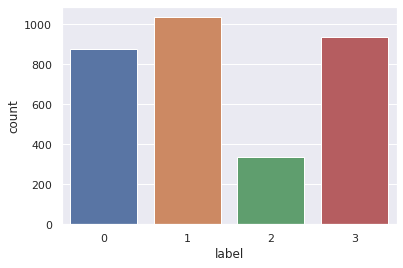

In [48]:
ax=sns.countplot(x="label",data=Polyp_Train)

In [49]:
Polyp_Test=Polyp_Test.reset_index()
Polyp_Test=Polyp_Test.drop(columns='index',axis=1)
Polyp_Test.head()

,case,image1,image2,image3,image4,image5,image6,image7,image8,image9,image10,image11,image12,label
0,../input/bounding-boxes/Bounding Boxes/case95/,../input/bounding-boxes/Bounding Boxes/case95/...,../input/bounding-boxes/Bounding Boxes/case95/...,../input/bounding-boxes/Bounding Boxes/case95/...,../input/bounding-boxes/Bounding Boxes/case95/...,../input/bounding-boxes/Bounding Boxes/case95/...,../input/bounding-boxes/Bounding Boxes/case95/...,../input/bounding-boxes/Bounding Boxes/case95/...,../input/bounding-boxes/Bounding Boxes/case95/...,../input/bounding-boxes/Bounding Boxes/case95/...,../input/bounding-boxes/Bounding Boxes/case95/...,../input/bounding-boxes/Bounding Boxes/case95/...,../input/bounding-boxes/Bounding Boxes/case95/...,1
1,../input/bounding-boxes/Bounding Boxes/case38/,../input/bounding-boxes/Bounding Boxes/case38/...,../input/bounding-boxes/Bounding Boxes/case38/...,../input/bounding-boxes/Bounding Boxes/case38/...,../input/bounding-boxes/Bounding Boxes/case38/...,../input/bounding-boxes/Bounding Boxes/case38/...,../input/bounding-boxes/Bounding Boxes/case38/...,../input/bounding-boxes/Bounding Boxes/case38/...,../input/bounding-boxes/Bounding Boxes/case38/...,../input/bounding-boxes/Bounding Boxes/case38/...,../input/bounding-boxes/Bounding Boxes/case38/...,../input/bounding-boxes/Bounding Boxes/case38/...,../input/bounding-boxes/Bounding Boxes/case38/...,1
2,../input/bounding-boxes/Bounding Boxes/case20/,../input/bounding-boxes/Bounding Boxes/case20/...,../input/bounding-boxes/Bounding Boxes/case20/...,../input/bounding-boxes/Bounding Boxes/case20/...,../input/bounding-boxes/Bounding Boxes/case20/...,../input/bounding-boxes/Bounding Boxes/case20/...,../input/bounding-boxes/Bounding Boxes/case20/...,../input/bounding-boxes/Bounding Boxes/case20/...,../input/bounding-boxes/Bounding Boxes/case20/...,../input/bounding-boxes/Bounding Boxes/case20/...,../input/bounding-boxes/Bounding Boxes/case20/...,../input/bounding-boxes/Bounding Boxes/case20/...,../input/bounding-boxes/Bounding Boxes/case20/...,0
3,../input/bounding-boxes/Bounding Boxes/case93/,../input/bounding-boxes/Bounding Boxes/case93/...,../input/bounding-boxes/Bounding Boxes/case93/...,../input/bounding-boxes/Bounding Boxes/case93/...,../input/bounding-boxes/Bounding Boxes/case93/...,../input/bounding-boxes/Bounding Boxes/case93/...,../input/bounding-boxes/Bounding Boxes/case93/...,../input/bounding-boxes/Bounding Boxes/case93/...,../input/bounding-boxes/Bounding Boxes/case93/...,../input/bounding-boxes/Bounding Boxes/case93/...,../input/bounding-boxes/Bounding Boxes/case93/...,../input/bounding-boxes/Bounding Boxes/case93/...,../input/bounding-boxes/Bounding Boxes/case93/...,1
4,../input/bounding-boxes/Bounding Boxes/case61/,../input/bounding-boxes/Bounding Boxes/case61/...,../input/bounding-boxes/Bounding Boxes/case61/...,../input/bounding-boxes/Bounding Boxes/case61/...,../input/bounding-boxes/Bounding Boxes/case61/...,../input/bounding-boxes/Bounding Boxes/case61/...,../input/bounding-boxes/Bounding Boxes/case61/...,../input/bounding-boxes/Bounding Boxes/case61/...,../input/bounding-boxes/Bounding Boxes/case61/...,../input/bounding-boxes/Bounding Boxes/case61/...,../input/bounding-boxes/Bounding Boxes/case61/...,../input/bounding-boxes/Bounding Boxes/case61/...,../input/bounding-boxes/Bounding Boxes/case61/...,1


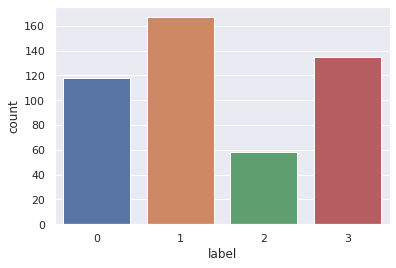

In [50]:
ax=sns.countplot(x="label",data=Polyp_Test)

In [51]:
Polyp_Valid=Polyp_Valid.reset_index()
Polyp_Valid=Polyp_Valid.drop(columns='index',axis=1)
Polyp_Valid.head()

,case,image1,image2,image3,image4,image5,image6,image7,image8,image9,image10,image11,image12,label
0,../input/bounding-boxes/Bounding Boxes/case99/,../input/bounding-boxes/Bounding Boxes/case99/...,../input/bounding-boxes/Bounding Boxes/case99/...,../input/bounding-boxes/Bounding Boxes/case99/...,../input/bounding-boxes/Bounding Boxes/case99/...,../input/bounding-boxes/Bounding Boxes/case99/...,../input/bounding-boxes/Bounding Boxes/case99/...,../input/bounding-boxes/Bounding Boxes/case99/...,../input/bounding-boxes/Bounding Boxes/case99/...,../input/bounding-boxes/Bounding Boxes/case99/...,../input/bounding-boxes/Bounding Boxes/case99/...,../input/bounding-boxes/Bounding Boxes/case99/...,../input/bounding-boxes/Bounding Boxes/case99/...,1
1,../input/bounding-boxes/Bounding Boxes/case7/,../input/bounding-boxes/Bounding Boxes/case7/c...,../input/bounding-boxes/Bounding Boxes/case7/c...,../input/bounding-boxes/Bounding Boxes/case7/c...,../input/bounding-boxes/Bounding Boxes/case7/c...,../input/bounding-boxes/Bounding Boxes/case7/c...,../input/bounding-boxes/Bounding Boxes/case7/c...,../input/bounding-boxes/Bounding Boxes/case7/c...,../input/bounding-boxes/Bounding Boxes/case7/c...,../input/bounding-boxes/Bounding Boxes/case7/c...,../input/bounding-boxes/Bounding Boxes/case7/c...,../input/bounding-boxes/Bounding Boxes/case7/c...,../input/bounding-boxes/Bounding Boxes/case7/c...,3
2,../input/bounding-boxes/Bounding Boxes/case91/,../input/bounding-boxes/Bounding Boxes/case91/...,../input/bounding-boxes/Bounding Boxes/case91/...,../input/bounding-boxes/Bounding Boxes/case91/...,../input/bounding-boxes/Bounding Boxes/case91/...,../input/bounding-boxes/Bounding Boxes/case91/...,../input/bounding-boxes/Bounding Boxes/case91/...,../input/bounding-boxes/Bounding Boxes/case91/...,../input/bounding-boxes/Bounding Boxes/case91/...,../input/bounding-boxes/Bounding Boxes/case91/...,../input/bounding-boxes/Bounding Boxes/case91/...,../input/bounding-boxes/Bounding Boxes/case91/...,../input/bounding-boxes/Bounding Boxes/case91/...,2
3,../input/bounding-boxes/Bounding Boxes/case14/,../input/bounding-boxes/Bounding Boxes/case14/...,../input/bounding-boxes/Bounding Boxes/case14/...,../input/bounding-boxes/Bounding Boxes/case14/...,../input/bounding-boxes/Bounding Boxes/case14/...,../input/bounding-boxes/Bounding Boxes/case14/...,../input/bounding-boxes/Bounding Boxes/case14/...,../input/bounding-boxes/Bounding Boxes/case14/...,../input/bounding-boxes/Bounding Boxes/case14/...,../input/bounding-boxes/Bounding Boxes/case14/...,../input/bounding-boxes/Bounding Boxes/case14/...,../input/bounding-boxes/Bounding Boxes/case14/...,../input/bounding-boxes/Bounding Boxes/case14/...,3
4,../input/bounding-boxes/Bounding Boxes/case33/,../input/bounding-boxes/Bounding Boxes/case33/...,../input/bounding-boxes/Bounding Boxes/case33/...,../input/bounding-boxes/Bounding Boxes/case33/...,../input/bounding-boxes/Bounding Boxes/case33/...,../input/bounding-boxes/Bounding Boxes/case33/...,../input/bounding-boxes/Bounding Boxes/case33/...,../input/bounding-boxes/Bounding Boxes/case33/...,../input/bounding-boxes/Bounding Boxes/case33/...,../input/bounding-boxes/Bounding Boxes/case33/...,../input/bounding-boxes/Bounding Boxes/case33/...,../input/bounding-boxes/Bounding Boxes/case33/...,../input/bounding-boxes/Bounding Boxes/case33/...,1


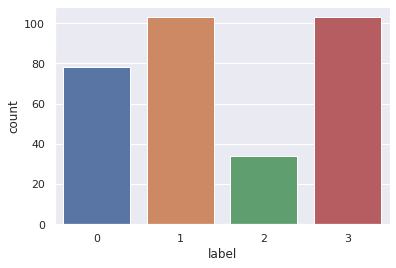

In [52]:
ax=sns.countplot(x="label",data=Polyp_Valid)

Creating dataloaders

In [53]:
train_dataset=seq_polyp_data(image_frames=Polyp_Train)
test_dataset=seq_polyp_data(image_frames=Polyp_Test)
valid_dataset=seq_polyp_data(image_frames=Polyp_Valid)

In [54]:
params={
    'device':"cuda",
    'batch_size':2,
    'epoch':2,
    'lr':0.001
}

In [55]:
model=Net()

In [56]:
model = model.to(params["device"])
criterion = nn.CrossEntropyLoss().to(params["device"])
optimizer = torch.optim.Adam(model.parameters(), lr=params["lr"])

In [57]:
from torch.utils.data import  DataLoader

In [58]:
train_loader = DataLoader(
    train_dataset, batch_size=params["batch_size"], shuffle=True, pin_memory=True,
)
val_loader = DataLoader(
    valid_dataset, batch_size=params["batch_size"], shuffle=False, pin_memory=True,
)
test_loader = DataLoader(
    test_dataset, batch_size=params["batch_size"], shuffle=False, pin_memory=True,
)

In [59]:
#model=Net()
#model=model.cuda()
training_loss=[]
testing_loss=[]
n_epochs=2
for  epoch in range(2):
    running_loss=0.0
    iterations=0
    model.train()
    for idx,data in (enumerate(train_loader)):
        images,labels=data
        images=images.cuda()
        labels=labels.cuda()
        outputs=model(images)
        optimizer.zero_grad()
        loss=criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
        
        training_loss.append(running_loss/(iterations+1))
        print('Training_Loss after {}th iteration {} : '.format(iterations,training_loss[iterations]),end="\r")
        iterations+=1
    print("\n")
    
        
        

Training_Loss after 1590th iteration 1.1685690729609062 : 

Training_Loss after 1590th iteration 1.1685690729609062 : 



In [60]:
outputs

tensor([[ 0.3655,  0.1670, -0.4005, -0.2241]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [63]:
preds=[]
for idx,data in enumerate(test_loader):
    image,label=data
    image=image.cuda()
    pred=model(image)
    _,pred=torch.max(pred,axis=1)
    preds.append(pred)

In [66]:
targets=[]
for idx,data in enumerate(test_loader):
    image,label=data
    targets.append(label)


In [64]:
new_preds=[]

for item in range(len(preds)):
    for idx in range(len(preds[item])):
        ele=preds[item][idx]
        new_preds.append(ele)

In [67]:
new_targets=[]


for item in range(len(targets)):
    for idx in range(len(targets[item])):
        ele=targets[item][idx]
        new_targets.append(ele)

In [68]:
for idx in range(len(new_targets)):
    new_targets[idx]=new_targets[idx].cpu()
    new_preds[idx]=new_preds[idx].cpu()

In [69]:
new_targets=np.array(new_targets)
new_preds=np.array(new_preds)
for idx in range(new_targets.shape[0]):
    new_targets[idx]=int(new_targets[idx])
    new_preds[idx]=int(new_preds[idx])

In [70]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(new_targets,new_preds)

In [71]:
cm

array([[70, 33,  6,  9],
       [45, 77, 14, 31],
       [ 3, 19, 21, 15],
       [23, 14,  9, 89]])

In [ ]:
new_preds[:5]

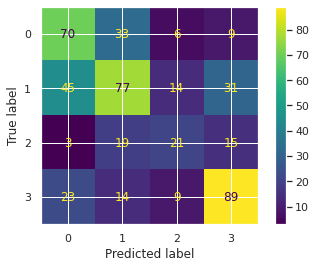

In [72]:
disp=ConfusionMatrixDisplay(cm)

disp.plot()
plt.show()

In [76]:
from sklearn.metrics import accuracy_score,f1_score

In [77]:
accuracy_score(new_targets,new_preds)

0.5376569037656904

In [79]:
f1_score(new_targets,new_preds,average='macro')

0.5160491136297587